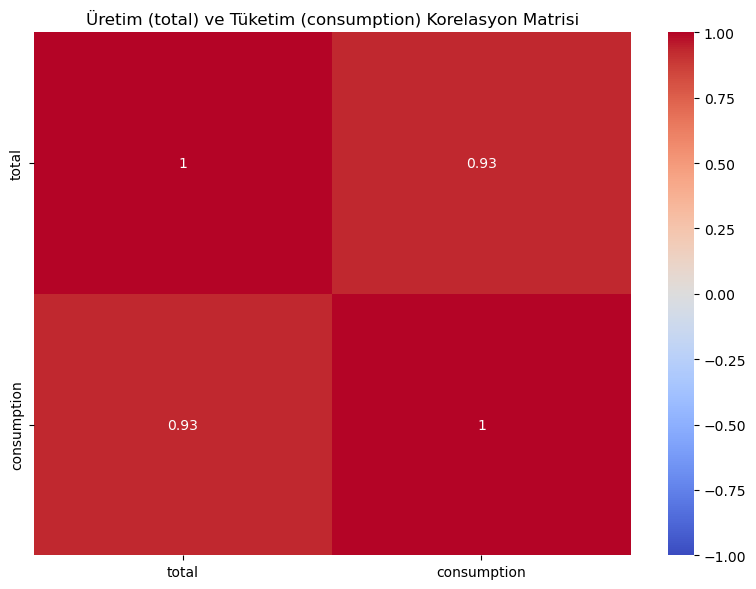

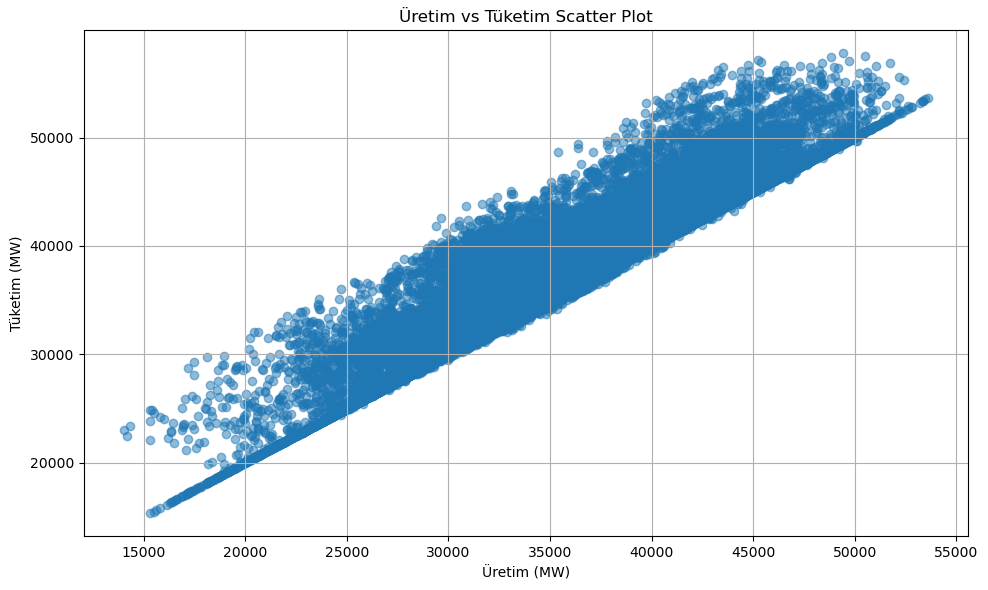


Üretim ve Tüketim arasındaki Pearson korelasyon katsayısı: 0.9342

Veri setinin ilk 5 satırı:
                Tarih     total  consumption
0 2018-12-01 00:00:00  31782.78     31782.78
1 2018-12-01 01:00:00  30016.48     30016.48
2 2018-12-01 02:00:00  28713.42     28713.42
3 2018-12-01 03:00:00  27838.91     27838.91
4 2018-12-01 04:00:00  27621.64     27621.64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

consumption_path = "csv_files/realtime_consumption_data.csv"
generation_path = "csv_files/realtime_generation_data.csv"

df_consumption = pd.read_csv(consumption_path)
df_generation = pd.read_csv(generation_path)

df_consumption['Tarih'] = pd.to_datetime(df_consumption['Tarih'] + ' ' + df_consumption['hour'], format='%d.%m.%Y %H:%M')
df_generation['Tarih'] = pd.to_datetime(df_generation['Tarih'] + ' ' + df_generation['hour'], format='%d.%m.%Y %H:%M')

df = pd.merge(df_generation[['Tarih', 'total']], 
              df_consumption[['Tarih', 'consumption']], 
              on='Tarih', 
              how='inner')

correlation = df[['total', 'consumption']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Üretim (total) ve Tüketim (consumption) Korelasyon Matrisi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['total'], df['consumption'], alpha=0.5)
plt.xlabel('Üretim (MW)')
plt.ylabel('Tüketim (MW)')
plt.title('Üretim vs Tüketim Scatter Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nÜretim ve Tüketim arasındaki Pearson korelasyon katsayısı: {correlation.iloc[0,1]:.4f}")

print("\nVeri setinin ilk 5 satırı:")
print(df.head())

In [3]:
def remove_outliers(df, columns, n_std=3):
    """
    n_std standart sapmanın dışındaki değerleri temizler
    """
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] <= mean + (n_std * std)) & 
                (df[col] >= mean - (n_std * std))]
    return df

df_cleaned = remove_outliers(df, ['total', 'consumption'])

new_correlation = df_cleaned[['total', 'consumption']].corr()
print(f"Temizlenmiş veri korelasyonu: {new_correlation.iloc[0,1]:.4f}")

Temizlenmiş veri korelasyonu: 0.9341


In [4]:
df['hour'] = df['Tarih'].dt.hour

df_daytime = df[(df['hour'] >= 8) & (df['hour'] <= 20)]
daytime_corr = df_daytime[['total', 'consumption']].corr()
print(f"Gündüz saatleri korelasyonu: {daytime_corr.iloc[0,1]:.4f}")

df['weekday'] = df['Tarih'].dt.weekday
df_workdays = df[df['weekday'] < 5]
workday_corr = df_workdays[['total', 'consumption']].corr()
print(f"İş günleri korelasyonu: {workday_corr.iloc[0,1]:.4f}")

Gündüz saatleri korelasyonu: 0.8908
İş günleri korelasyonu: 0.9381


In [5]:
df['month'] = df['Tarih'].dt.month
df['season'] = pd.cut(df['month'], 
                     bins=[0,3,6,9,12], 
                     labels=['Kış', 'İlkbahar', 'Yaz', 'Sonbahar'])

for season in df['season'].unique():
    season_corr = df[df['season']==season][['total', 'consumption']].corr()
    print(f"{season} mevsimi korelasyonu: {season_corr.iloc[0,1]:.4f}")

Sonbahar mevsimi korelasyonu: 0.9324
Kış mevsimi korelasyonu: 0.9517
İlkbahar mevsimi korelasyonu: 0.9136
Yaz mevsimi korelasyonu: 0.9129
